
Test Accuracy (Decision Tree): 87.85%
Classification Report (Decision Tree):
                 precision    recall  f1-score   support

      Positive       0.87      0.91      0.89       308
      Negative       0.90      0.92      0.91       321
  Not_relevant       0.85      0.80      0.82       351
Mixed Feelings       0.95      1.00      0.98       294
       Neutral       0.82      0.79      0.80       298

      accuracy                           0.88      1572
     macro avg       0.88      0.88      0.88      1572
  weighted avg       0.88      0.88      0.88      1572



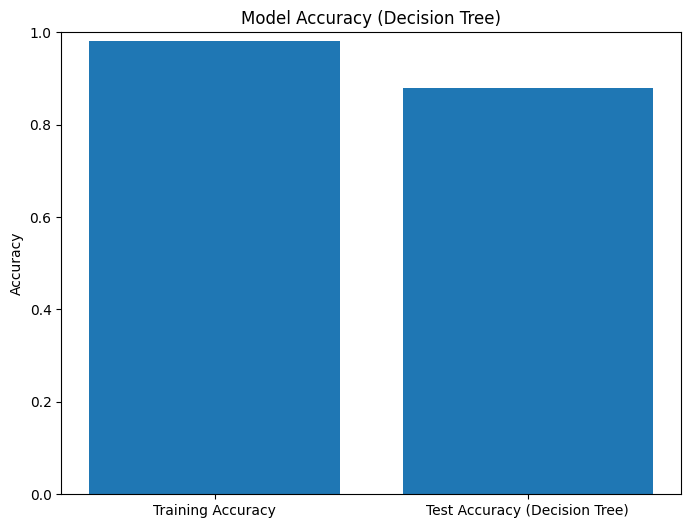

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load data from CSV
file_path = 'final_manglish_emoji.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure 'commentText' column contains strings
data['commentText'] = data['commentText'].astype(str)

# Function to convert sentiment labels to numerical values
sentiment_dict = {
    'Positive': 0,
    'Negative': 1,
    'Not_relevant': 2,
    'Mixed Feelings': 3,
    'Neutral': 4
}

data['Sentiment_Class'] = data['Sentiment_Class'].map(sentiment_dict)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['commentText'])
y = data['Sentiment_Class']

# Upsample minority classes to match the size of the majority class
data_upsampled = pd.concat([
    resample(data[data['Sentiment_Class'] == sentiment_dict['Positive']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Negative']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Mixed Feelings']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Neutral']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']]))
])

# TF-IDF vectorization for balanced data
X_upsampled = tfidf_vectorizer.fit_transform(data_upsampled['commentText'])
y_upsampled = data_upsampled['Sentiment_Class']

# Split the upsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.05, random_state=42)

# Build and train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the Decision Tree model on test data
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"\nTest Accuracy (Decision Tree): {accuracy_tree * 100:.2f}%")

# Generate predictions for Decision Tree
reverse_sentiment_dict = {v: k for k, v in sentiment_dict.items()}
y_pred_labels_tree = [reverse_sentiment_dict[label] for label in y_pred_tree]

# Print complete classification report for Decision Tree
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_tree, target_names=sentiment_dict.keys()))

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Test Accuracy (Decision Tree)'], [accuracy_score(y_train, tree_model.predict(X_train)), accuracy_tree])
plt.ylabel('Accuracy')
plt.title('Model Accuracy (Decision Tree)')
plt.ylim(0, 1)
plt.show()



Test Accuracy (Decision Tree): 85.56%
Classification Report (Decision Tree):
                 precision    recall  f1-score   support

      Positive       0.84      0.86      0.85      1262
      Negative       0.88      0.90      0.89      1257
  Not_relevant       0.79      0.77      0.78      1238
Mixed Feelings       0.94      1.00      0.97      1218
       Neutral       0.83      0.76      0.79      1312

      accuracy                           0.86      6287
     macro avg       0.85      0.86      0.86      6287
  weighted avg       0.85      0.86      0.85      6287



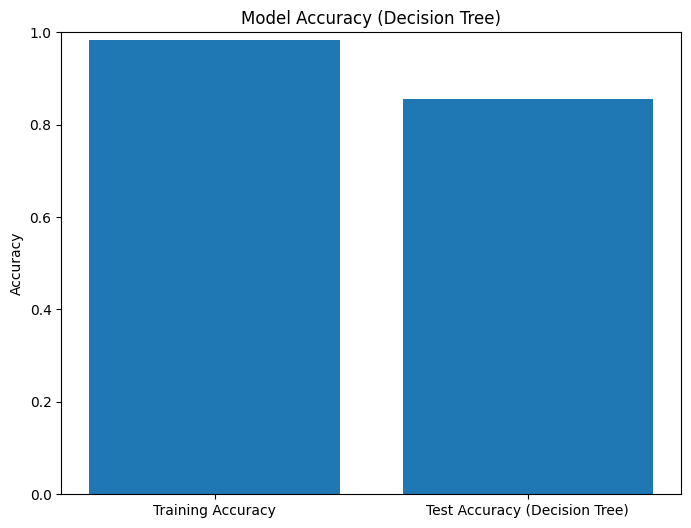

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load data from CSV
file_path = 'final_manglish_emoji.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Ensure 'commentText' column contains strings
data['commentText'] = data['commentText'].astype(str)

# Function to convert sentiment labels to numerical values
sentiment_dict = {
    'Positive': 0,
    'Negative': 1,
    'Not_relevant': 2,
    'Mixed Feelings': 3,
    'Neutral': 4
}

data['Sentiment_Class'] = data['Sentiment_Class'].map(sentiment_dict)

# Count vectorization
count_vectorizer = CountVectorizer(max_features=1000)
X = count_vectorizer.fit_transform(data['commentText'])
y = data['Sentiment_Class']

# Upsample minority classes to match the size of the majority class
data_upsampled = pd.concat([
    resample(data[data['Sentiment_Class'] == sentiment_dict['Positive']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Negative']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Mixed Feelings']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']])),
    resample(data[data['Sentiment_Class'] == sentiment_dict['Neutral']], replace=True, n_samples=len(data[data['Sentiment_Class'] == sentiment_dict['Not_relevant']]))
])

# Count vectorization for balanced data
X_upsampled = count_vectorizer.fit_transform(data_upsampled['commentText'])
y_upsampled = data_upsampled['Sentiment_Class']

# Split the upsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=10)

# Build and train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the Decision Tree model on test data
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"\nTest Accuracy (Decision Tree): {accuracy_tree * 100:.2f}%")

# Generate predictions for Decision Tree
reverse_sentiment_dict = {v: k for k, v in sentiment_dict.items()}
y_pred_labels_tree = [reverse_sentiment_dict[label] for label in y_pred_tree]

# Print complete classification report for Decision Tree
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_tree, target_names=sentiment_dict.keys()))

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.bar(['Training Accuracy', 'Test Accuracy (Decision Tree)'], [accuracy_score(y_train, tree_model.predict(X_train)), accuracy_tree])
plt.ylabel('Accuracy')
plt.title('Model Accuracy (Decision Tree)')
plt.ylim(0, 1)
plt.show()
